In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('/Users/NUS/DSS5105/validation_root'))
from src.validator import GreenMarkValidator
from src.viz_helpers import ValidationVisualizer
from src.feedback import FeedbackCollector

In [2]:
# Initialize Components
def setup_validation_system():
    """Initialize validator, visualizer and feedback collector"""
    validator = GreenMarkValidator()
    visualizer = ValidationVisualizer()
    feedback_collector = FeedbackCollector()
    return validator, visualizer, feedback_collector

# Test initialization
validator, visualizer, feedback_collector = setup_validation_system()
print("Validation system initialized successfully!")

Validation system initialized successfully!



Validation Results:


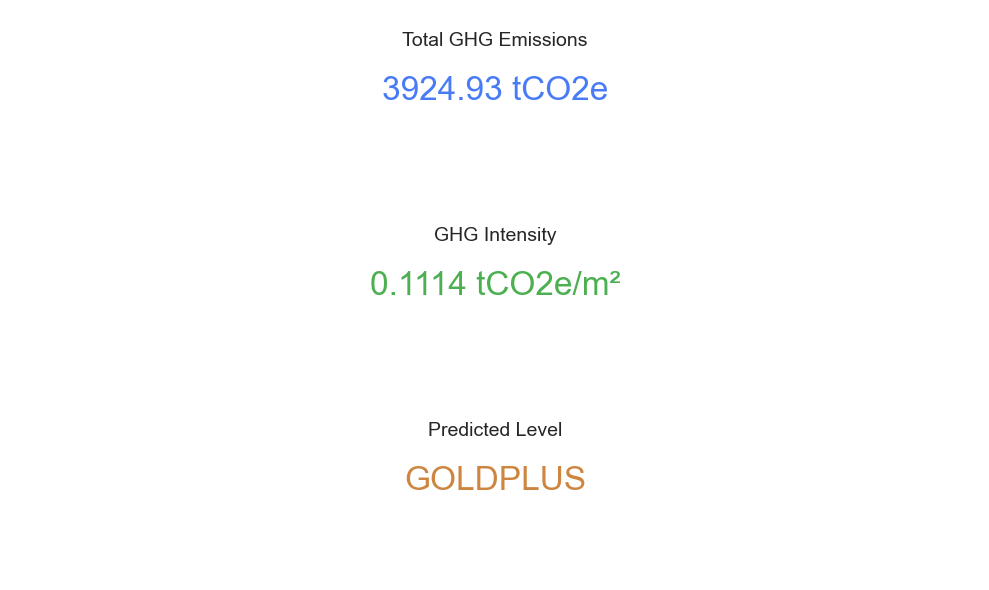

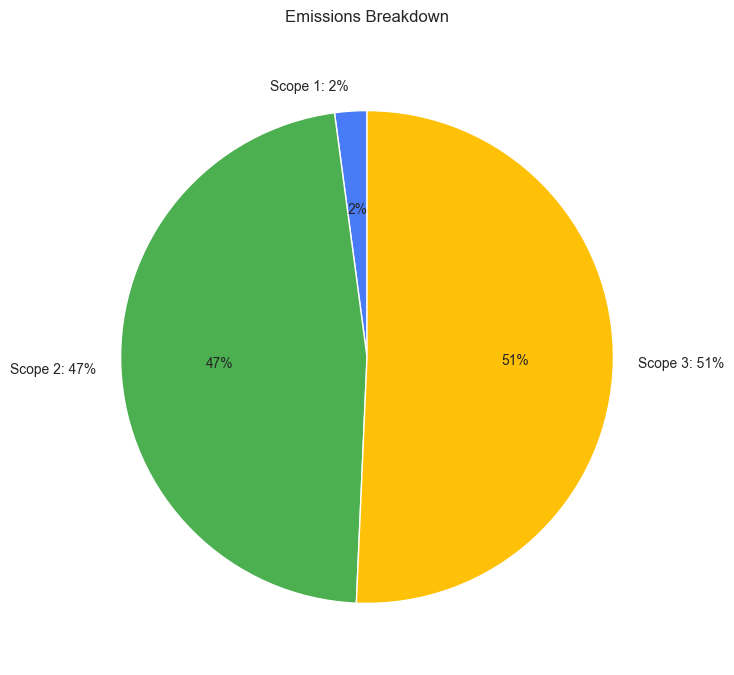

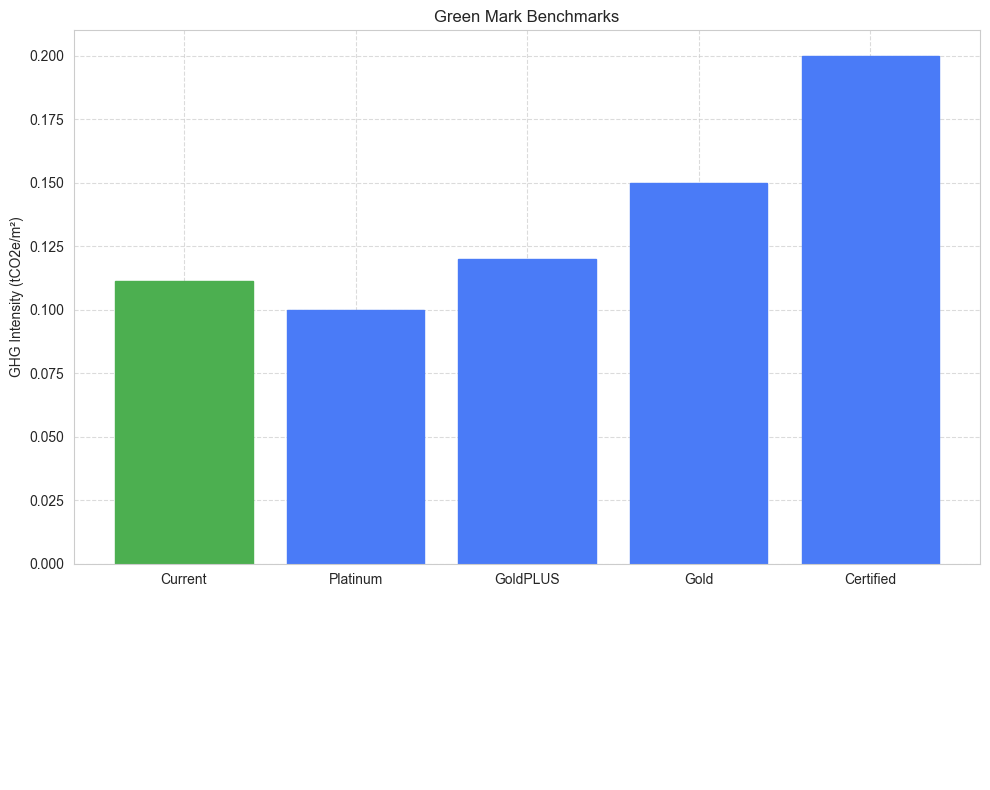

In [3]:
# Example building data
single_building = {
    'scope1': 82.74,
    'scope2': 1852.64,
    'scope3': 1989.55,
    'gfa': 35218.0
}

# Get prediction
result = validator.predict_green_mark(**single_building)

# Display results
if result['success']:
    print("\nValidation Results:")
    visualizer.plot_ghg_results(result)
    plt.show()
    
    visualizer.plot_emissions_breakdown(result)
    plt.show()
    
    visualizer.plot_benchmarks(result)
    plt.show()


Processing Building 1

Results for Building 1:


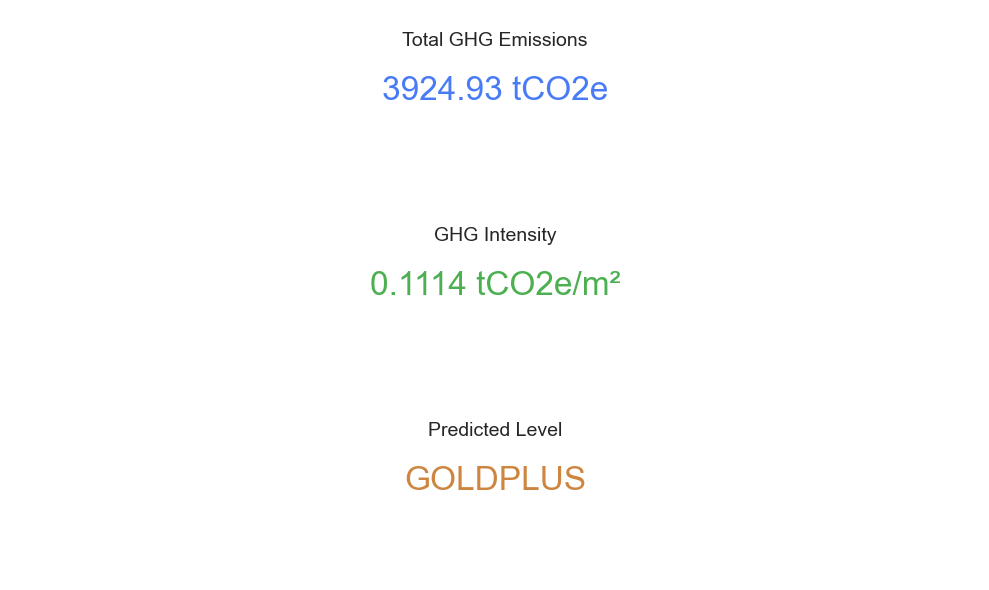

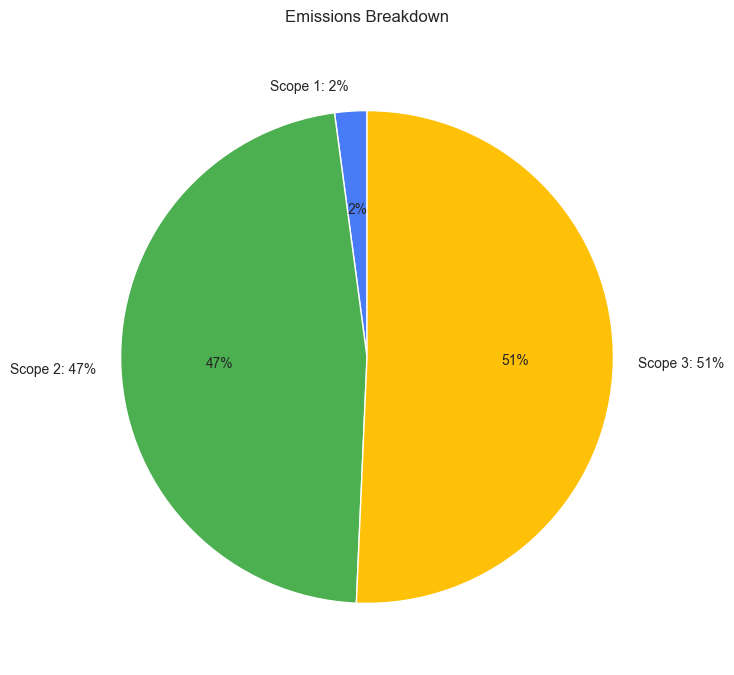

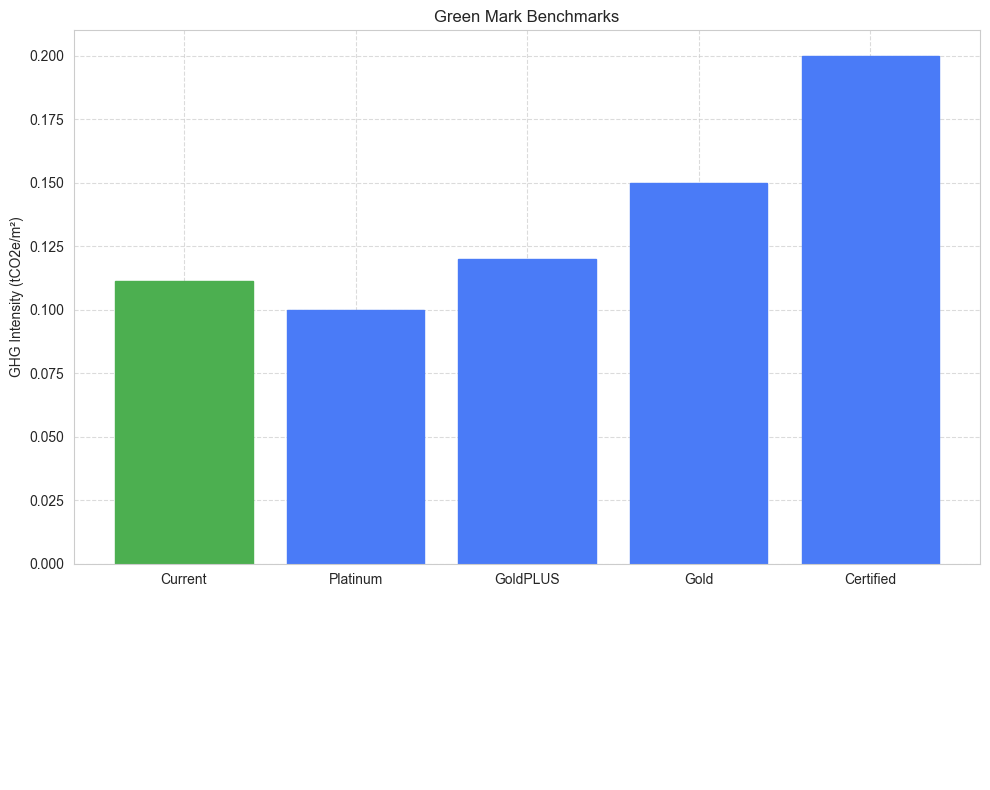


Processing Building 2

Results for Building 2:


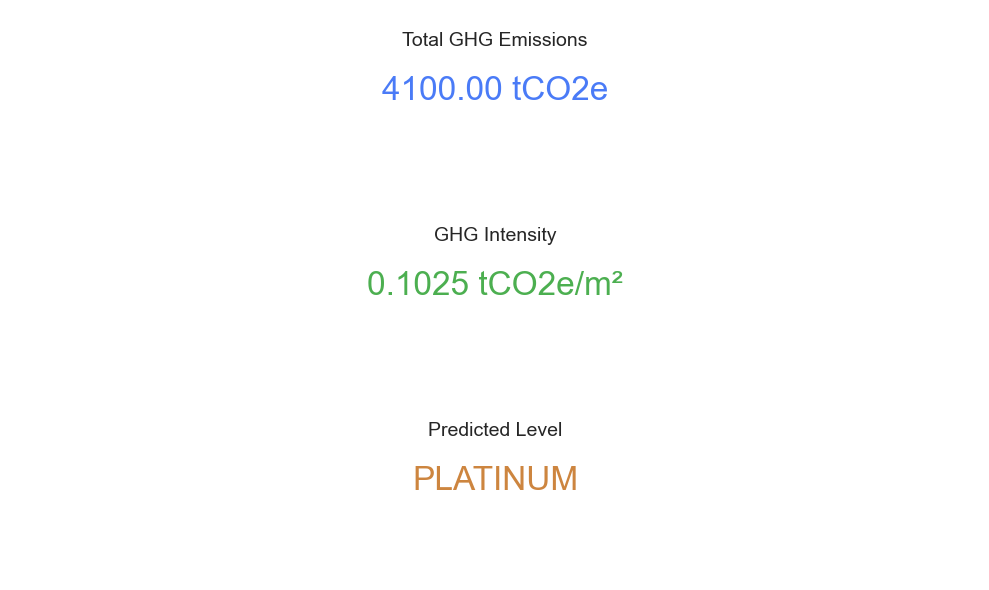

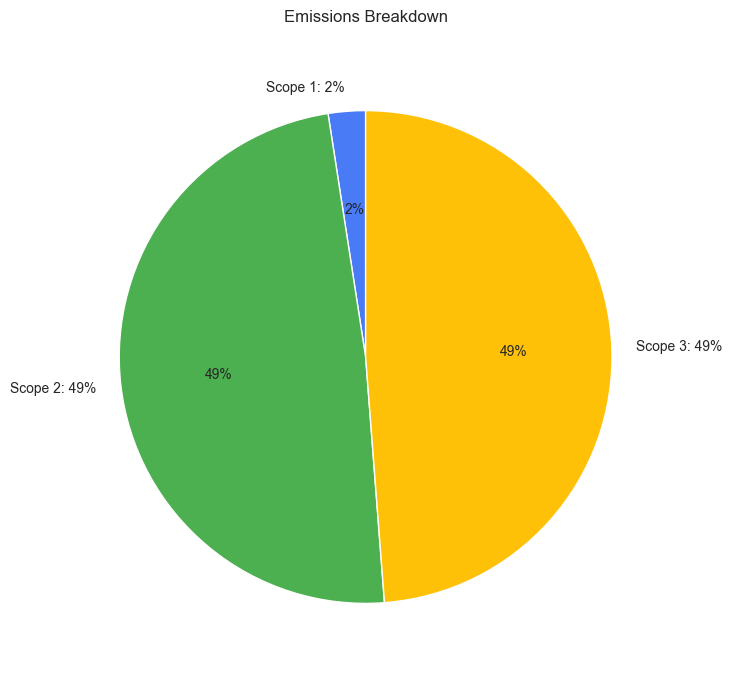

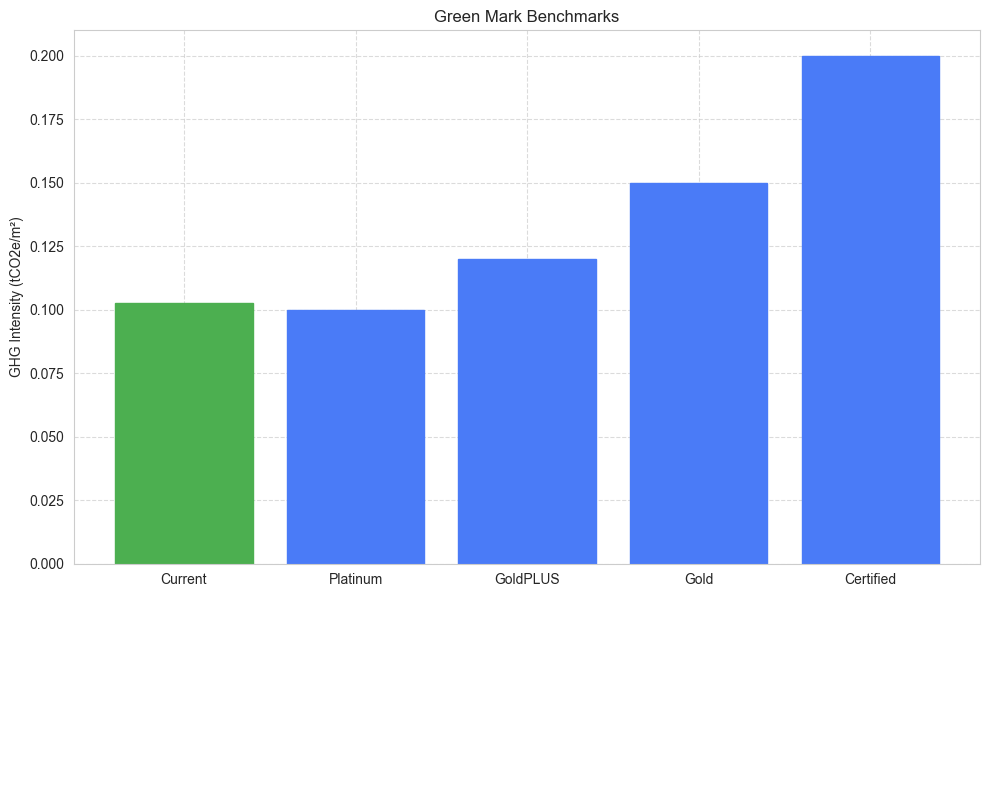


Processing Building 3

Results for Building 3:


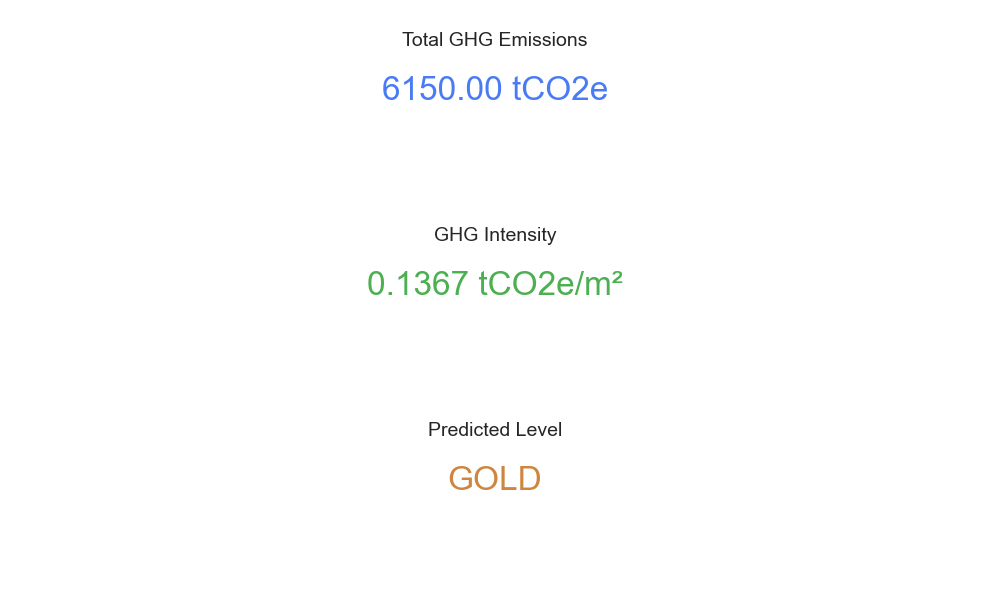

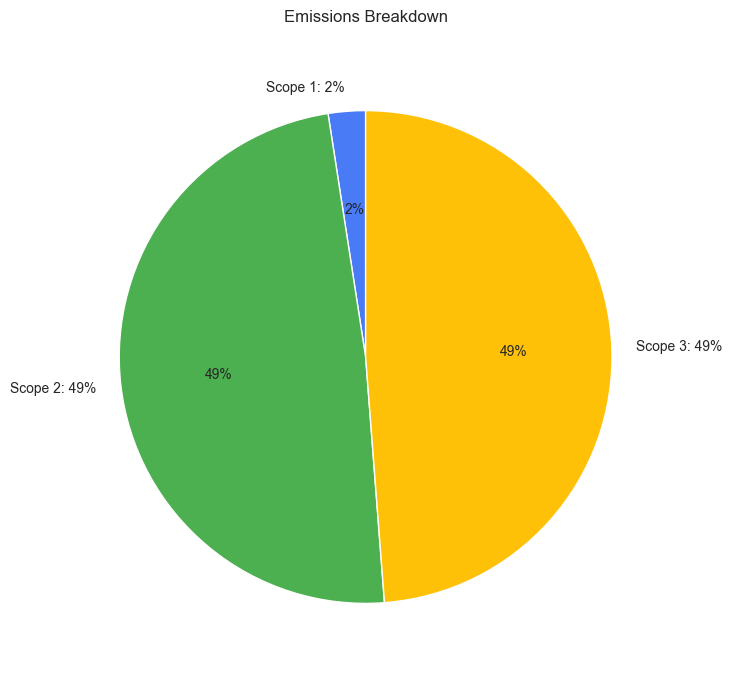

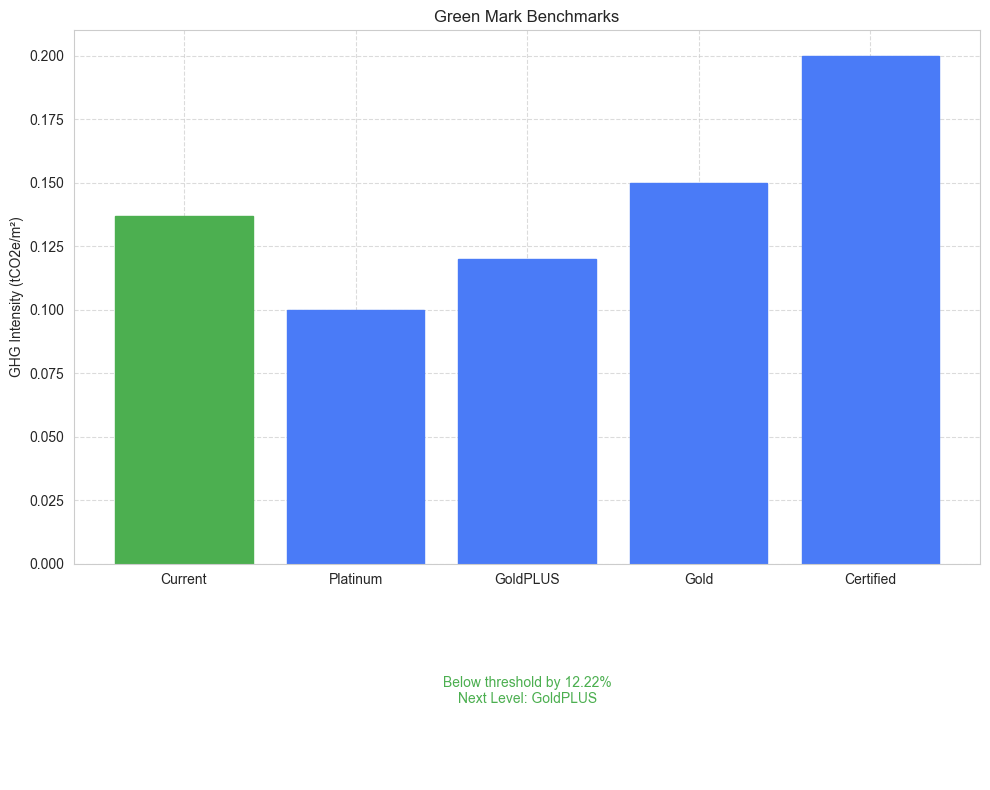

In [4]:
# Test Batch Processing
# Sample dataset
sample_df = pd.DataFrame({
    'scope1': [82.74, 100, 150],
    'scope2': [1852.64, 2000, 3000],
    'scope3': [1989.55, 2000, 3000],
    'gfa': [35218.0, 40000, 45000]
})

# Process each building
for idx, row in sample_df.iterrows():
    print(f"\nProcessing Building {idx + 1}")
    result = validator.predict_green_mark(
        scope1=row['scope1'],
        scope2=row['scope2'],
        scope3=row['scope3'],
        gfa=row['gfa']
    )
    
    if result['success']:
        print(f"\nResults for Building {idx + 1}:")
        visualizer.plot_ghg_results(result)
        visualizer.plot_emissions_breakdown(result)
        visualizer.plot_benchmarks(result)
        plt.show()

In [5]:
# Test Feedback Collection
feedback = feedback_collector.collect_feedback(
    green_mark_accuracy=3,
    ghg_calculation_clarity=3,
    visualization_helpfulness=3,
    feature_ratings={
        'ghg_intensity': 3,
        'emissions_breakdown': 3,
        'benchmark_comparison': 3
    },
    requested_features=[
        'Historical data comparison',
        'Comparison with similar buildings'
    ],
    overall_satisfaction=3
)

print("\nFeedback collected successfully!")

# Analyze feedback
analysis = feedback_collector.analyze_feedback()
print("\nFeedback Analysis:")
print(analysis)


Feedback collected successfully!

Feedback Analysis:
{'average_ratings': {'green_mark_accuracy': np.float64(3.0), 'ghg_calculation_clarity': np.float64(3.0), 'visualization_helpfulness': np.float64(3.0), 'overall_satisfaction': np.float64(3.0)}, 'feature_ratings': {'ghg_intensity': np.float64(3.0), 'emissions_breakdown': np.float64(3.0), 'benchmark_comparison': np.float64(3.0)}, 'most_requested_features': {'Historical data comparison': 7, 'Comparison with similar buildings': 7}, 'total_responses': 7}
